In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import os

In [2]:
image_size=[224,224]

In [3]:
train_directory='new_brain_train'
test_directory='new_brain_test'

In [4]:
from glob import glob
train_yes=glob('new_brain_train/yes/*')

In [5]:
len(train_yes)

3793

In [6]:
train_no=glob('new_brain_train/no/*')

In [7]:
len(train_no)

1238

In [8]:
test_yes=glob('new_brain_test/yes/*')

In [9]:
len(test_yes)

789

In [10]:
test_no=glob('new_brain_test/no/*')

In [11]:
len(test_no)

397

In [12]:
from glob import glob
folder_length=glob('brain_tumor_dataset_training/*')

In [13]:
len(folder_length)

2

In [14]:
folder_length_no=glob('brain_tumor_dataset_training/yes/*')

In [15]:
len(folder_length_no)

155

In [16]:
folder_length_no

['brain_tumor_dataset_training/yes\\Y1.jpg',
 'brain_tumor_dataset_training/yes\\Y10.jpg',
 'brain_tumor_dataset_training/yes\\Y100.JPG',
 'brain_tumor_dataset_training/yes\\Y101.jpg',
 'brain_tumor_dataset_training/yes\\Y102.jpg',
 'brain_tumor_dataset_training/yes\\Y103.jpg',
 'brain_tumor_dataset_training/yes\\Y104.jpg',
 'brain_tumor_dataset_training/yes\\Y105.jpg',
 'brain_tumor_dataset_training/yes\\Y106.jpg',
 'brain_tumor_dataset_training/yes\\Y107.jpg',
 'brain_tumor_dataset_training/yes\\Y108.jpg',
 'brain_tumor_dataset_training/yes\\Y109.JPG',
 'brain_tumor_dataset_training/yes\\Y11.jpg',
 'brain_tumor_dataset_training/yes\\Y111.JPG',
 'brain_tumor_dataset_training/yes\\Y112.JPG',
 'brain_tumor_dataset_training/yes\\Y113.JPG',
 'brain_tumor_dataset_training/yes\\Y114.JPG',
 'brain_tumor_dataset_training/yes\\Y115.JPG',
 'brain_tumor_dataset_training/yes\\Y116.JPG',
 'brain_tumor_dataset_training/yes\\Y117.JPG',
 'brain_tumor_dataset_training/yes\\Y12.jpg',
 'brain_tumor_data

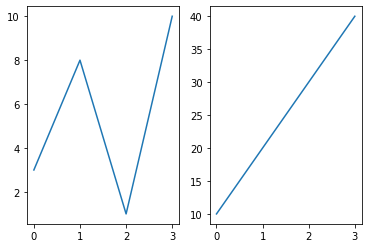

In [99]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()

In [25]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    print(layer)
  layer.trainable = False

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [18]:
from tensorflow.keras.layers import MaxPooling2D
folders=glob('brain_tumor_dataset_training/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x=Dropout(0.1)(x)


x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)



prediction = Dense(1, activation='sigmoid')(x)    

In [19]:
from tensorflow.keras.layers import Flatten
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
train_directory='new_brain_train'
test_directory='new_brain_test'

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5031 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [23]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
158/158 [==============================] - 1037s 7s/step - loss: 0.3632 - accuracy: 0.8799 - val_loss: 0.4013 - val_accuracy: 0.8204
Epoch 2/5
158/158 [==============================] - 981s 6s/step - loss: 0.1133 - accuracy: 0.9535 - val_loss: 0.1556 - val_accuracy: 0.9309
Epoch 3/5
158/158 [==============================] - 974s 6s/step - loss: 0.0936 - accuracy: 0.9656 - val_loss: 0.1686 - val_accuracy: 0.9275
Epoch 4/5
158/158 [==============================] - 951s 6s/step - loss: 0.0784 - accuracy: 0.9708 - val_loss: 0.1248 - val_accuracy: 0.9545
Epoch 5/5
158/158 [==============================] - 981s 6s/step - loss: 0.0682 - accuracy: 0.9738 - val_loss: 0.1218 - val_accuracy: 0.9562


In [26]:
his=r.history

In [27]:
history=his.keys()

In [28]:
history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
r.history['val_accuracy']

[0.8204047083854675,
 0.9308600425720215,
 0.9274873733520508,
 0.9544687867164612,
 0.9561551213264465]

In [30]:
model.evaluate(test_set)

38/38 [==============================] - 200s 5s/step - loss: 0.1218 - accuracy: 0.9562


[0.1217922568321228, 0.9561551213264465]

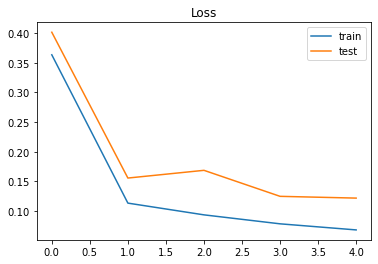

In [31]:
from matplotlib import pyplot

pyplot.title('Loss')
pyplot.plot(r.history['loss'], label='train')
pyplot.plot(r.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


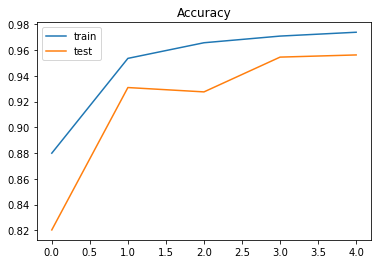

In [32]:

pyplot.title('Accuracy')
pyplot.plot(r.history['accuracy'], label='train')
pyplot.plot(r.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

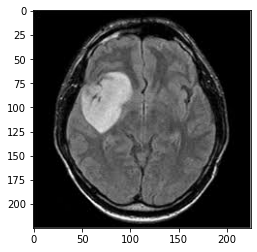

In [38]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('Y4.jpg')    
plt.imshow(img)
plt.show()
    

In [39]:
import numpy as np  
from tensorflow.keras.preprocessing import image  
test_image = image.load_img('Y4.jpg', target_size = (224,224))  
test_image = image.img_to_array(test_image)  
test_image = np.expand_dims(test_image, axis = 0) 
result = model.predict(test_image) 
training_set.class_indices

if result[0][0] == 1:  
  prediction = 'affected tumor'  
elif result[0][0]==0:  
  prediction = 'no tumor'
else:
    print("unknown")

  
print(prediction)  

1/1 [==============================] - 0s 219ms/step
affected tumor


In [70]:
from sklearn.metrics import confusion_matrix


In [71]:
yhat_probs=model.predict(test_set)

38/38 [==============================] - 184s 5s/step


In [72]:
import numpy as np
yhat_classes=np.argmax(yhat_probs,axis=1)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [73]:
yhat_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
yhat_probs[55]


array([0.99694204], dtype=float32)

In [66]:
yhat_classes[22]

0

In [67]:
yhat_probs

array([[1.        ],
       [1.        ],
       [0.00838562],
       ...,
       [0.00286437],
       [1.        ],
       [0.9975736 ]], dtype=float32)

In [68]:
for i in yhat_classes:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
